### IMPORT LIBRARIES

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


In [2]:
benin = pd.read_csv('../data/benin-malanville_clean.csv')
sierraleone = pd.read_csv('../data/sierraleone-bumbuna_cleaned.csv')
togo = pd.read_csv('../data/togo-dapaong_cleaned.csv')

In [3]:
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierraleone'
togo['Country'] = 'Togo'

In [4]:
data = pd.concat([benin, sierraleone, togo], ignore_index = True)

## Metric Comparison
### Boxplots

C:\Users\PC\AppData\Local\Temp\ipykernel_5588\1304746614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y=metric, palette='Set2')


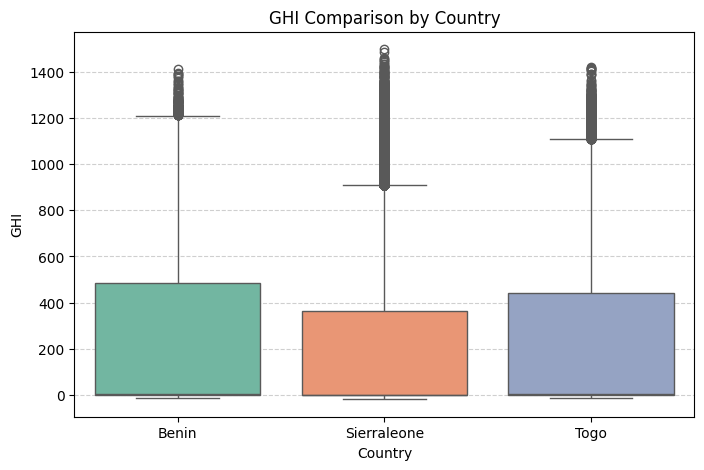

C:\Users\PC\AppData\Local\Temp\ipykernel_5588\1304746614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y=metric, palette='Set2')


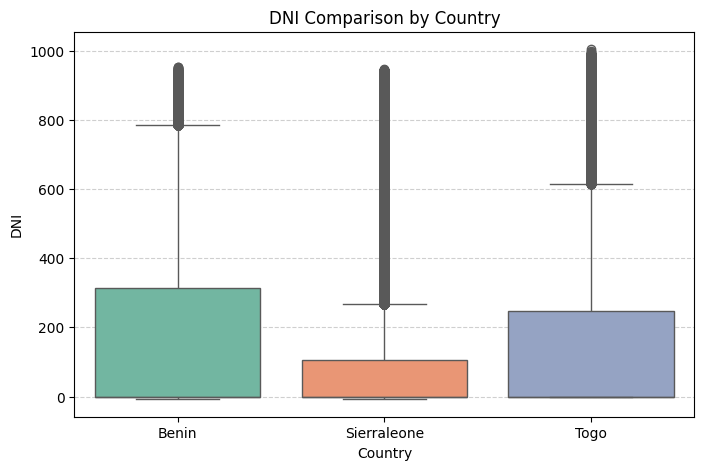

C:\Users\PC\AppData\Local\Temp\ipykernel_5588\1304746614.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Country', y=metric, palette='Set2')


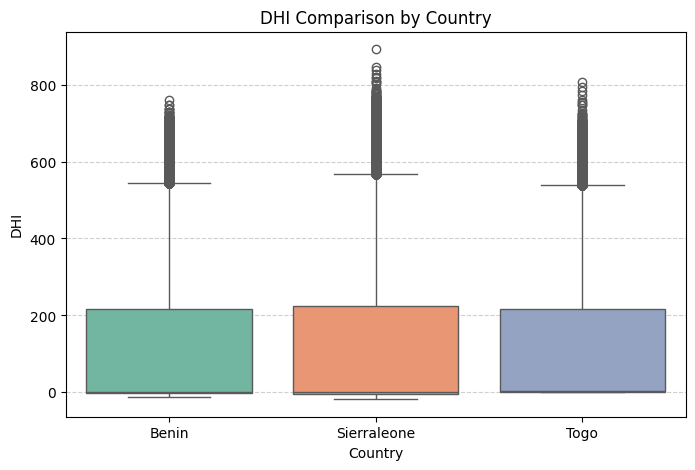

In [5]:
metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=data, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Comparison by Country')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.show()

### Summary Table 

In [6]:
summary = data.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierraleone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo         230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                     
                std  
Country              
Benin        158.69  
Sierraleone  158.95  
Togo         156.52

### Statical Testing

In [12]:
anova_stat, anova_p = f_oneway(benin['GHI'], sierraleone['GHI'], togo['GHI'])
kruskal_stat, kruskal_p = kruskal(benin['GHI'], sierraleone['GHI'], togo['GHI'])
print("One-way ANOVA: F =", anova_stat, ", p =", anova_p)
print("Kruskal–Wallis: H =", kruskal_stat, ", p =", kruskal_p)

One-way ANOVA: F = 2090.092870479579 , p = 0.0
Kruskal–Wallis: H = 4524.883491942792 , p = 0.0


### Key Insights from GHI Comparison

- **Togo** shows the **highest median GHI** values overall, indicating stronger solar potential compared to other countries.  
- **Benin** displays the **greatest variability** in GHI, suggesting less consistency in solar irradiance throughout the dataset.  
- The **ANOVA/Kruskal–Wallis test (p < 0.05)** confirms that **differences in GHI between countries are statistically significant**.




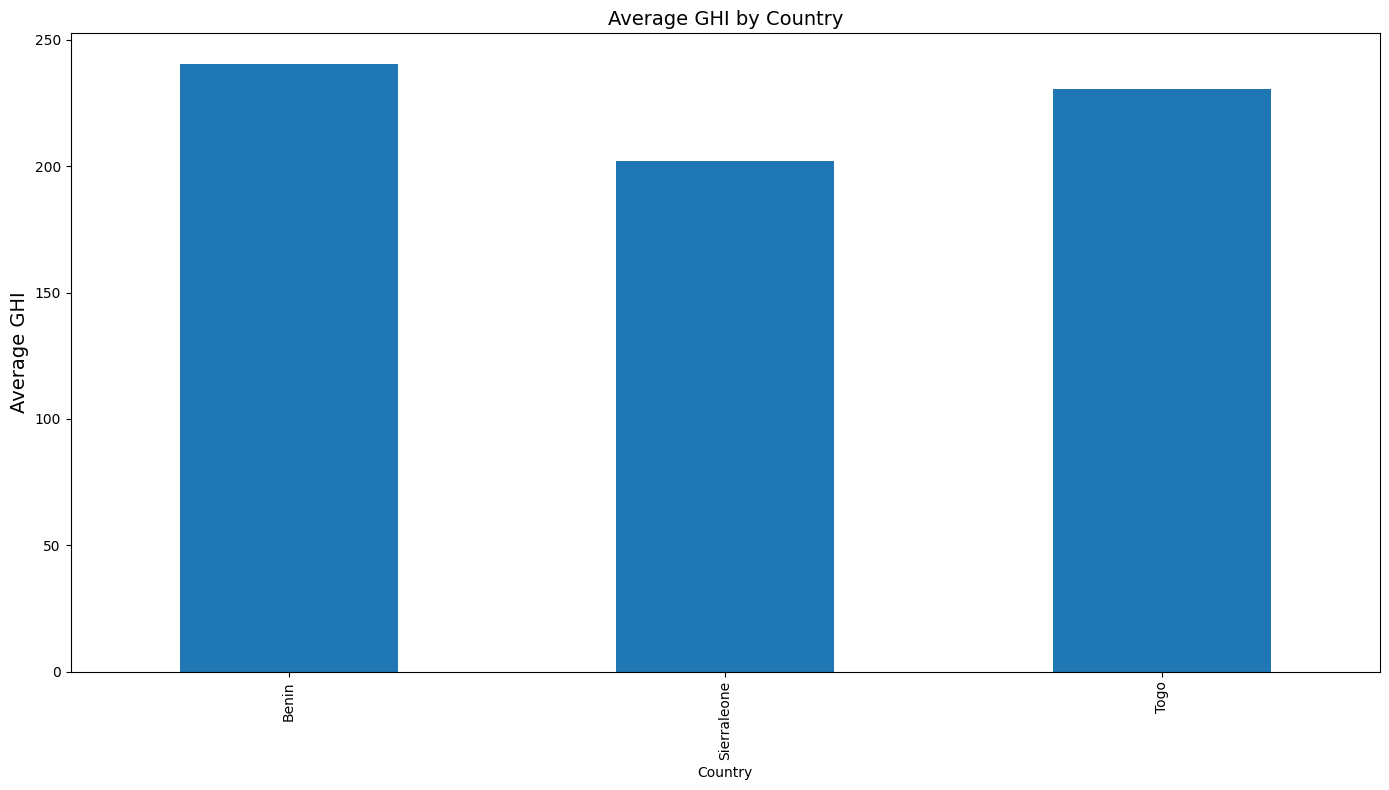

In [18]:
ave_ghi = data.groupby('Country')['GHI'].mean()
ave_ghi.plot(kind='bar', figsize=(14,8))

plt.title("Average GHI by Country", fontsize=14)
plt.ylabel("Average GHI", fontsize=14)
plt.tight_layout()

plt.show()